# Data Understanding

The data for this data science project in researching factors influencing teenage alcoholism was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#). It was donated to the site by Prof. Paulo Cortez of University Minho. His original work on the dataset, "USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE, can be found [here](http://www3.dsi.uminho.pt/pcortez/student.pdf)

The data set consists of information on various attributes for each student, taking Portuguese language classes who come from ether of the two higher secondary schools, The Gabriel Pereira School and  the Mousinho da Silveira School. There is information on 649 students on 33 attributes. A list of all the features with description can be found on [Readme](https://github.com/Yeshi341/Student_Alcohol_Consumption/blob/master/Readme.md) section of the Github page to this project. The features have also been described sequentially as [EDA]('EDA.ipynb') was performed on each variable in the EDA notebook.

In [129]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report,confusion_matrix

In [130]:
df = pd.read_csv('student-por.csv')

## Data Preparation- data cleaning and transformations

In [131]:

print('Rows and Columns :', df.shape,'\n' ) 

print('INFO:')
print(df.info(), '\n')

print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (649, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     6

In [132]:

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0

In [133]:
conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)

In [134]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob           int32
Fjob           int32
reason         int32
guardian       int32
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [135]:
df.shape

(649, 33)

In [136]:
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
10     15
9       6
Name: week_alc, dtype: int64

0    529
1    120
Name: alc, dtype: int64
0    0.8151
1    0.1849
Name: alc, dtype: float64


Text(0.5, 1.0, 'Distribution of Heavy Drinkers VS Light drinkers')

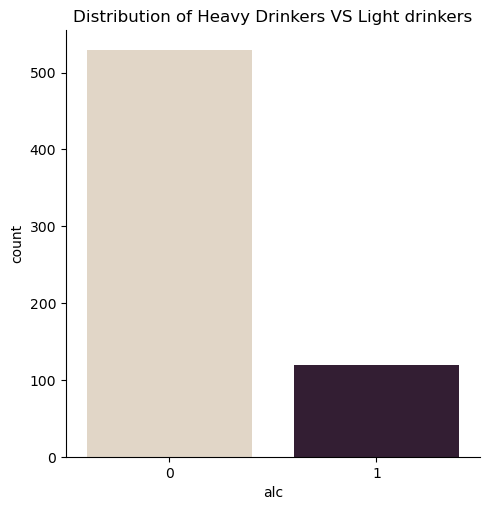

In [137]:
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
plt.title('Distribution of Heavy Drinkers VS Light drinkers')

In [138]:
# checking for Nan values
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

## Exploratory Data Analysis === Check here for [EDA]('EDA.ipynb')

# Feature Engineering

Feature quantifying family stability 

In [139]:
df['stability'] = df['famrel'] * df['famsize']
df.drop(columns = ['famrel','famsize'], axis = 1, inplace = True)

Descriptive Statistics : 
 count     649
unique      6
top         4
freq      222
Name: stability, dtype: int64
Correlation with target var 'alc consumption' : 
 -0.0726995336883851
percentage of data distrib : 
 4    0.342065
0    0.295840
5    0.192604
3    0.118644
2    0.027735
1    0.023112
Name: stability, dtype: float64


<Axes: xlabel='stability', ylabel='alc'>

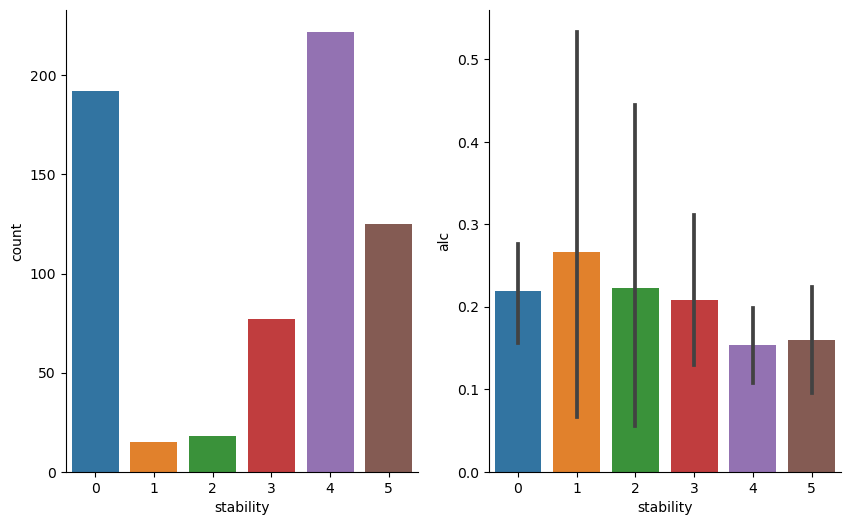

In [140]:
print("Descriptive Statistics :", '\n', df['stability'].describe())
df['stability']=df['stability'].apply(int)
print("Correlation with target var 'alc consumption' :", '\n', df['stability'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.stability.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="stability", data=df,  ax = ax[0])
sns.barplot(x="stability", y = 'alc', data=df,  ax = ax[1])

feature quantifying academic support network

In [141]:
df['academic_support'] = df.famsup + df.schoolsup  + df.higher 
df.drop(columns = ['famsup','schoolsup','higher'], axis = 1, inplace = True)

Descriptive Statistics : 
 count     649
unique      4
top         2
freq      338
Name: academic_support, dtype: int64
Correlation with target var 'alc consumption' : 
 -0.12700967935895713
percentage of data distrib : 
 2    0.520801
1    0.352851
3    0.072419
0    0.053929
Name: academic_support, dtype: float64


<Axes: xlabel='academic_support', ylabel='alc'>

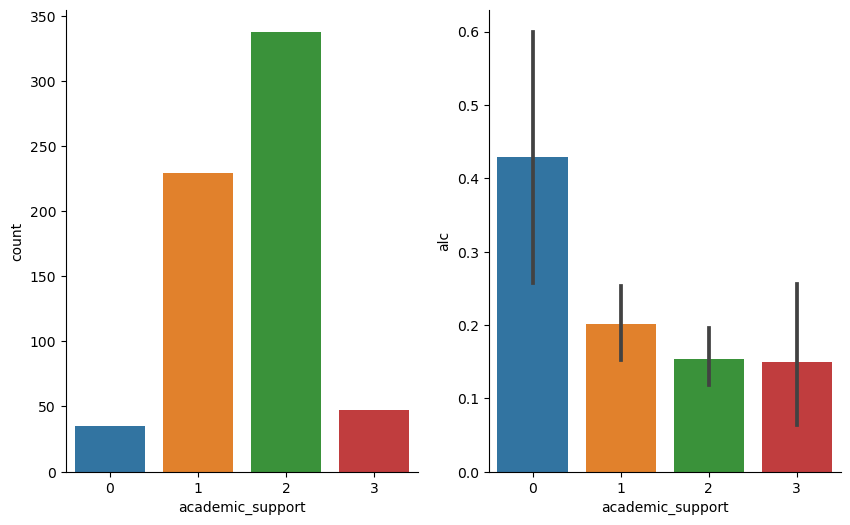

In [142]:
print("Descriptive Statistics :", '\n', df['academic_support'].describe())
df['academic_support']=df['academic_support'].apply(int)
print("Correlation with target var 'alc consumption' :", '\n', df['academic_support'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.academic_support.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="academic_support", data=df,  ax = ax[0])
sns.barplot(x="academic_support",  y ='alc', data=df,  ax = ax[1])

In [143]:
df['idle'] = df.goout*df.freetime
df.drop(columns = ['goout','freetime'], axis = 1, inplace = True)

Descriptive Statistics : 
 count    649.000000
mean      10.556240
std        6.037971
min        1.000000
25%        6.000000
50%        9.000000
75%       15.000000
max       25.000000
Name: idle, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.2586993675902269
percentage of data distrib : 
 9     0.158706
12    0.149461
6     0.140216
16    0.097072
20    0.075501
4     0.069337
8     0.057011
25    0.053929
2     0.050847
3     0.047766
15    0.047766
10    0.032357
5     0.010786
1     0.009245
Name: idle, dtype: float64


<Axes: xlabel='idle', ylabel='alc'>

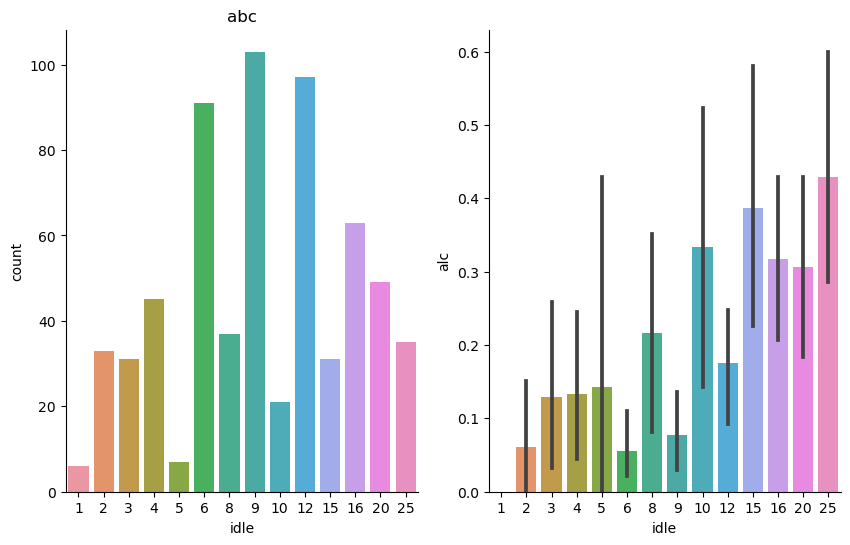

In [144]:
print("Descriptive Statistics :", '\n', df['idle'].describe())

print("Correlation with target variable 'alc consumption' :", '\n', df['idle'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.idle.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="idle", data=df,  ax = ax[0])
ax[0].set_title('abc')
sns.barplot(x="idle", y = 'alc', data=df,  ax = ax[1])

Average Grade

In [145]:
df['grade_avg'] = round((df.G1 + df.G2 + df.G3)/3, 2)
df.drop(columns = ['G1','G2','G3'], axis = 1, inplace = True)

Descriptive Statistics : 
 count    649.000000
mean      11.625116
std        2.833308
min        1.330000
25%       10.000000
50%       11.670000
75%       13.330000
max       18.670000
Name: grade_avg, dtype: float64
Correlation with target alc consumption : 
 -0.2107416959520687


C:\Users\bushra\AppData\Local\Temp\ipykernel_14704\2929289680.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["grade_avg"],bins=10, kde=True, hist=True)


<Axes: xlabel='grade_avg', ylabel='Density'>

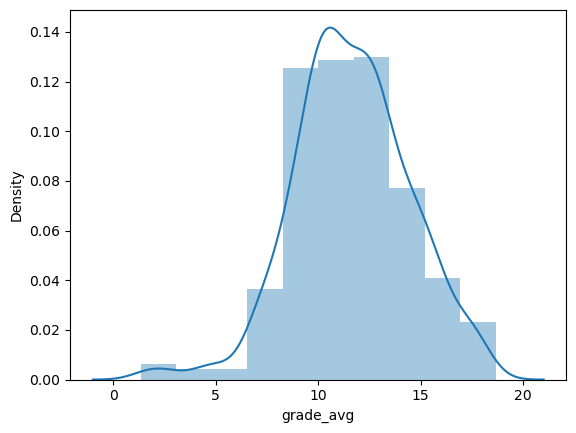

In [146]:
print("Descriptive Statistics :", '\n', df['grade_avg'].describe())
print("Correlation with target alc consumption :", '\n', df['grade_avg'].corr(df['alc']))

sns.despine(right=True)
sns.distplot(a=df["grade_avg"],bins=10, kde=True, hist=True)

# plt.figure(figsize=(5,8))
# df.boxplot(column='grade_avg', by = 'alc')

In [147]:
heavy = df.loc[df['alc'] == 1]
light = df.loc[df['alc'] == 0]
grades_heavy = heavy.grade_avg
grades_light =light.grade_avg
#print([grades_heavy,grades_light])

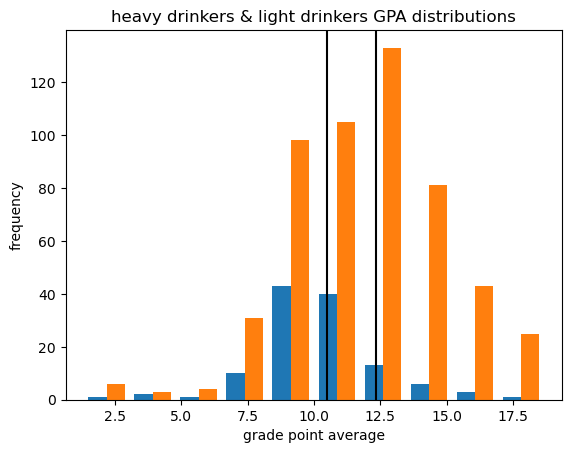

In [148]:
plt.hist([grades_heavy,grades_light], bins = 10)
plt.xlabel('grade point average')
plt.ylabel('frequency')
plt.title('heavy drinkers & light drinkers GPA distributions')
plt.axvline(x = 10.5, color = 'k')
plt.axvline(x = 12.33, color = 'k')
#plt.savefig('images/gpahist.png')
plt.show();

In [149]:
df['delinquency'] = (df['failures']) * df['absences']

Descriptive Statistics : 
 count    649.000000
mean       1.149461
std        4.515833
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       42.000000
Name: delinquency, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.1302357029824932
percentage of data distrib : 
 0     0.890601
4     0.020031
12    0.012327
2     0.012327
8     0.012327
6     0.012327
14    0.007704
30    0.004622
18    0.004622
16    0.004622
42    0.003082
5     0.003082
3     0.003082
9     0.003082
27    0.001541
26    0.001541
36    0.001541
1     0.001541
Name: delinquency, dtype: float64


C:\Users\bushra\AppData\Local\Temp\ipykernel_14704\1657001082.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["delinquency"],bins=10, kde = False ,hist=True)


<Axes: xlabel='delinquency'>

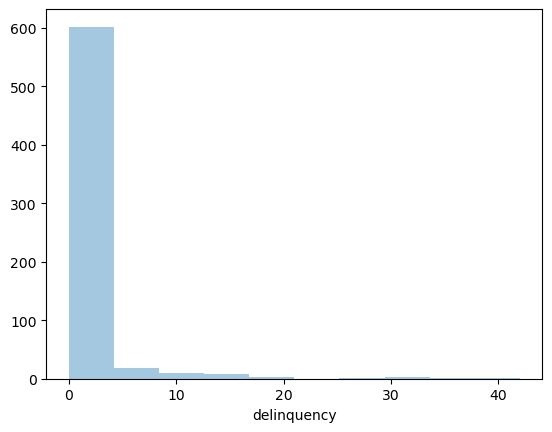

In [150]:
print("Descriptive Statistics :", '\n', df['delinquency'].describe())
print("Correlation with target variable 'alc consumption' :", '\n', df['delinquency'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.delinquency.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["delinquency"],bins=10, kde = False ,hist=True)

In [151]:
print(df.shape)

print(df.columns)

(649, 30)
Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'paid', 'activities', 'nursery', 'internet', 'romantic', 'Dalc', 'Walc',
       'health', 'absences', 'week_alc', 'alc', 'stability',
       'academic_support', 'idle', 'grade_avg', 'delinquency'],
      dtype='object')


In [152]:
dummy_feats = ['Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures','health']

df.drop(columns = ['week_alc', 'Dalc', 'Walc'], axis = 1, inplace = True)

In [153]:
dummy1 = pd.get_dummies(df['Medu'],drop_first= True, prefix='Medu')

dummy2 = pd.get_dummies(df['Fedu'],drop_first= True, prefix='Fedu')
dummy3 = pd.get_dummies(df['Mjob'],drop_first= True, prefix='Mjob')
dummy4 = pd.get_dummies(df['Fjob'],drop_first= True, prefix='Fjob')
dummy5 = pd.get_dummies(df['reason'],drop_first= True, prefix='reason')
dummy6 = pd.get_dummies(df['guardian'],drop_first= True, prefix='guardian')
dummy7 = pd.get_dummies(df['traveltime'],drop_first= True, prefix='traveltime')
dummy8 = pd.get_dummies(df['studytime'],drop_first= True, prefix='studytime')
dummy9 = pd.get_dummies(df['failures'],drop_first= True, prefix = 'failures')
dummy10 = pd.get_dummies(df['health'],drop_first= True, prefix='health')

In [154]:
df_list = [df, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, 
           dummy8, dummy9, dummy10]
df.drop(dummy_feats,axis=1,inplace=True)


In [155]:
for df in df_list:
    print(df.shape)

(649, 17)
(649, 4)
(649, 4)
(649, 4)
(649, 4)
(649, 3)
(649, 2)
(649, 3)
(649, 3)
(649, 3)
(649, 4)


In [156]:
df = pd.concat(df_list, axis = 1)

In [157]:
df

,school,sex,age,address,Pstatus,paid,activities,nursery,internet,romantic,...,studytime_2,studytime_3,studytime_4,failures_1,failures_2,failures_3,health_2,health_3,health_4,health_5
0,1,1,18,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,17,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,15,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,1,15,0,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,16,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
645,0,1,18,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
646,0,1,18,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
647,0,0,17,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [158]:
df.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'paid', 'activities',
       'nursery', 'internet', 'romantic', 'absences', 'alc', 'stability',
       'academic_support', 'idle', 'grade_avg', 'delinquency', 'Medu_1',
       'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4',
       'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_2', 'Fjob_3', 'Fjob_4',
       'Fjob_5', 'reason_2', 'reason_3', 'reason_4', 'guardian_2',
       'guardian_3', 'traveltime_2', 'traveltime_3', 'traveltime_4',
       'studytime_2', 'studytime_3', 'studytime_4', 'failures_1', 'failures_2',
       'failures_3', 'health_2', 'health_3', 'health_4', 'health_5'],
      dtype='object')

**Scaling**

In [159]:
scaler = MinMaxScaler()  
scaler.fit(df)

MinMaxScaler()

In [162]:
df.shape

(649, 51)

In [161]:
df.to_csv('preprocessing_file.csv',index=False)

In [163]:
df

,school,sex,age,address,Pstatus,paid,activities,nursery,internet,romantic,...,studytime_2,studytime_3,studytime_4,failures_1,failures_2,failures_3,health_2,health_3,health_4,health_5
0,1,1,18,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,17,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,15,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,1,15,0,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,16,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,19,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
645,0,1,18,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
646,0,1,18,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
647,0,0,17,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
